In [14]:
# from google.colab import drive
# drive.mount('/content/drive')

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Data exploration

In [16]:
df = pd.read_csv('cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [17]:
df.shape

(70000, 13)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [19]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Check for missing values

In [20]:
df.isnull().values.any()

False

In [21]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### Data preprocessing

Drop unique id as it is not relevant

In [22]:
df.drop(columns=['id'], axis=1, inplace=True)

Convert age value from day to year

In [23]:
df["age"] = round(df["age"] / 365)


Categorical values should be binary

In [24]:
df.gender = df.gender.replace(2,0)

Drop duplicate values



In [25]:
df.duplicated().sum()

3816

In [26]:
df.drop_duplicates(inplace=True)
df.shape

(66184, 12)

Remove height and weight and replace with new body mass index column

In [27]:
df['bmi'] = df['weight']/((df['height']/100)**2)
df=df.drop(['height','weight'],axis=1)

df.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.0,0,110,80,1,1,0,0,1,0,21.967120
1,55.0,1,140,90,3,1,0,0,1,1,34.927679
2,52.0,1,130,70,3,1,0,0,0,1,23.507805
3,48.0,0,150,100,1,1,0,0,1,1,28.710479
4,48.0,1,100,60,1,1,0,0,0,0,23.011177


### Correlation between features

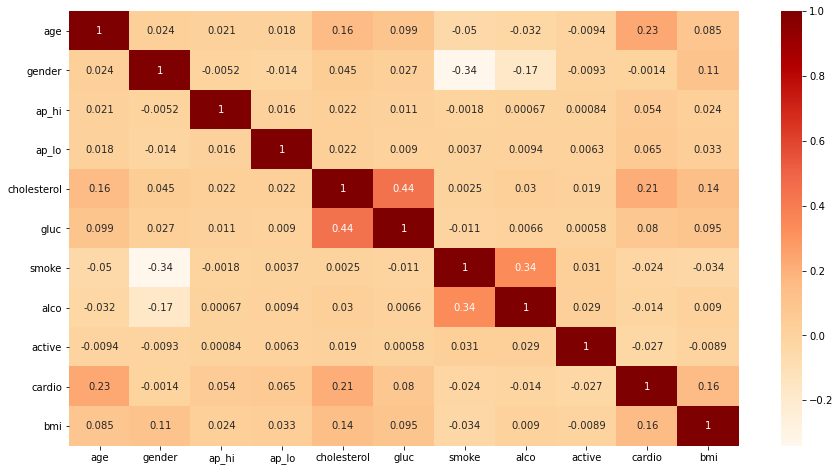

In [28]:
corrmat = df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corrmat, annot=True, cmap="OrRd")
plt.show()

### Define independent and dependent variables
Dependent variable/target: "cardio" 

In [29]:
X = df.drop(columns=['cardio'], axis=1)
y = df['cardio']

### Split dataset

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Standardize numeric values

In [31]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_train_copy = X_train.copy()
# X_train_copy[['age','ap_hi','ap_lo','bmi']] = scaler.fit_transform(X_train_copy[['age','ap_hi','ap_lo','bmi']])
# X_train_scaled = pd.DataFrame(X_train_copy, columns = X_train.columns)
# X_train = X_train_scaled

# X_test_copy = X_test.copy()
# X_test_copy[['age','ap_hi','ap_lo','bmi']] = scaler.transform(X_test_copy[['age','ap_hi','ap_lo','bmi']])
# X_test_scaled = pd.DataFrame(X_test_copy, columns=X_test.columns)
# X_test=X_test_scaled

### Train model
K-nearest neighbors classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
knn.score(X_test,y_test)

0.7238800332401601

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf.score(X_test,y_test)

0.671526780992672

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
lr.score(X_test,y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7232756666918486

### Test predictions

In [35]:
df.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.0,0,110,80,1,1,0,0,1,0,21.967120
1,55.0,1,140,90,3,1,0,0,1,1,34.927679
2,52.0,1,130,70,3,1,0,0,0,1,23.507805
3,48.0,0,150,100,1,1,0,0,1,1,28.710479
4,48.0,1,100,60,1,1,0,0,0,0,23.011177


In [36]:
knn.predict([[62.0, 1, 140, 90, 2, 2, 0, 0, 1, 50.472681]])

array([1], dtype=int64)

In [37]:
rf.predict([[61.0	,1	,135	,80	,1	,2	,0	,0	,0	,27.099251]])

array([1], dtype=int64)

In [38]:
lr.predict([[	50.0	,0	,110	,80	,1	,1	,0	,0	,1	,	21.967120]])

array([0], dtype=int64)

In [39]:
lr_pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': lr_pred,
})

lr_pred_df.tail()

,Actual Value,Predicted Value
58554,1,1
19166,0,0
23761,1,1
20644,1,1
11227,0,0


### Export KNN Model

In [46]:
from joblib import dump, load

# dump(knn, 'knn_clf_model.joblib')

In [47]:
knn_clf_model = load('knn_clf_model.joblib') 

In [48]:
knn_clf_model.predict([[62.0, 1, 140, 90, 2, 2, 0, 0, 1, 50.472681]])

array([1], dtype=int64)